In [1]:
pip install fbprophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [7]:
data = pd.read_csv('train.csv')

In [9]:
data.Datetime = pd.to_datetime(data.Datetime, format='%d-%m-%Y %H:%M')

In [11]:
data.index = data.Datetime

In [13]:
data.drop(['ID', 'Datetime'], inplace=True, axis=1)

In [14]:
data.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [15]:
daily_data = data.resample('D').sum()
daily_data['ds'] = daily_data.index
daily_data['y'] = daily_data.Count
daily_data.head()


,Count,ds,y
Datetime,,,
2012-08-25,76,2012-08-25,76
2012-08-26,88,2012-08-26,88
2012-08-27,62,2012-08-27,62
2012-08-28,58,2012-08-28,58
2012-08-29,60,2012-08-29,60


In [16]:
daily_data.drop(['Count'], axis=1, inplace=True)

In [19]:
model = Prophet()
model.fit(daily_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
feature = model.make_future_dataframe(periods=213)

In [23]:
res = model.predict(feature)

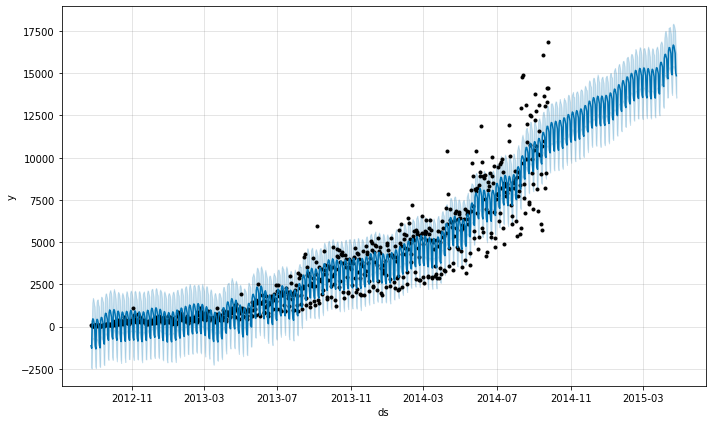

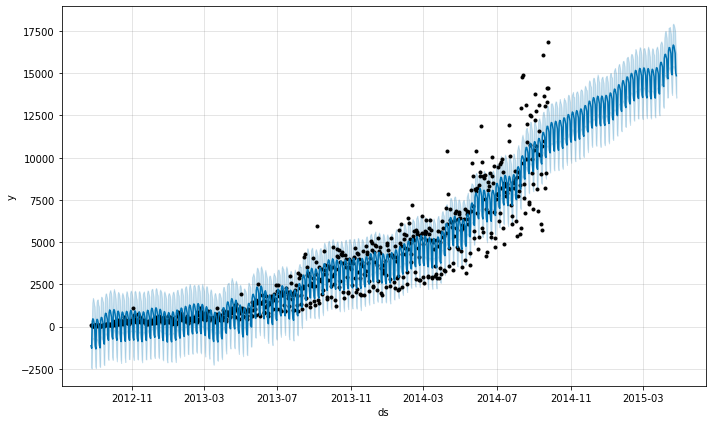

In [24]:
model.plot(res)

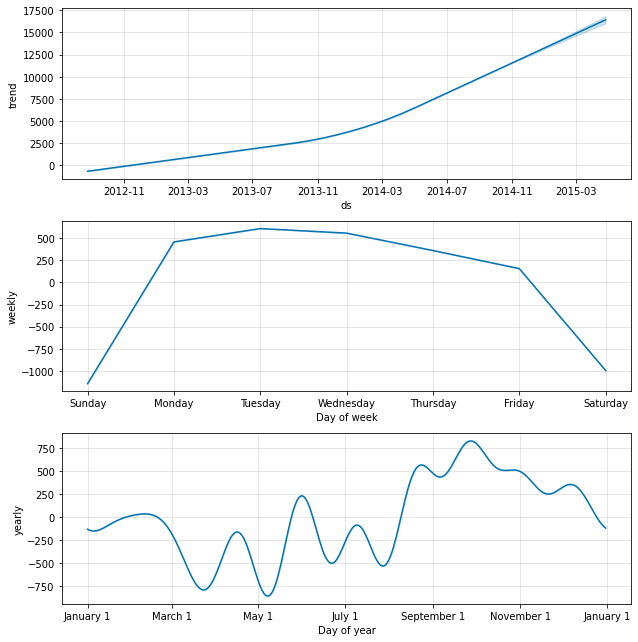

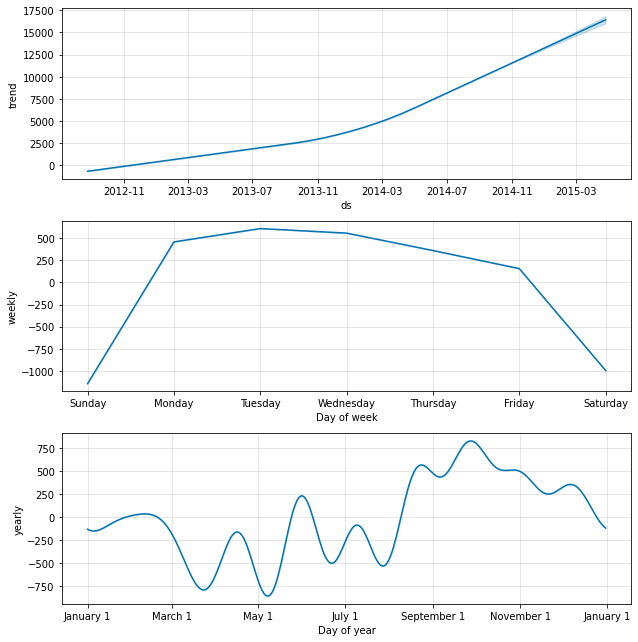

In [25]:
model.plot_components(res)